# Per-session variance of Top Bigrams

By "Top Bigram" we mean in terms of rank across the entire corpus. 

The top 20 child bigrams are the bigrams that appeared most frequently throughout all 34 session taken together as a whole. Here we examine the frequency of those bigrams per session.

In [13]:
%matplotlib inline

In [26]:
import pandas as pd
from matplotlib import pyplot


bigrams = pd.read_pickle('bigrams.pkl')

In [68]:
dataset = bigrams
target = dataset[dataset.corpus.eq('anne')]

def topgrams(df, speaker, n):
    return df[df.speaker.eq(speaker)].ngram.value_counts().nlargest(n).index

child = (target
         [target.speaker.eq('CHI')]
        .pivot_table(index='ngram', columns='session', aggfunc='size', fill_value=0)
        .T)

adult = (target
         [target.speaker.eq('MOT')]
        .pivot_table(index='ngram', columns='session', aggfunc='size', fill_value=0)
        .T)

# Child Bigrams

,mean,std
it 's,10.911765,7.341735
where 's,9.205882,7.478370
that one,8.294118,8.185462
do n't,7.000000,6.950038
that 's,6.441176,6.160437
ca n't,5.941176,5.376386
Anne 's,5.852941,8.995394
in the,5.411765,5.176390
what 's,5.117647,5.552857
this one,5.117647,4.989472


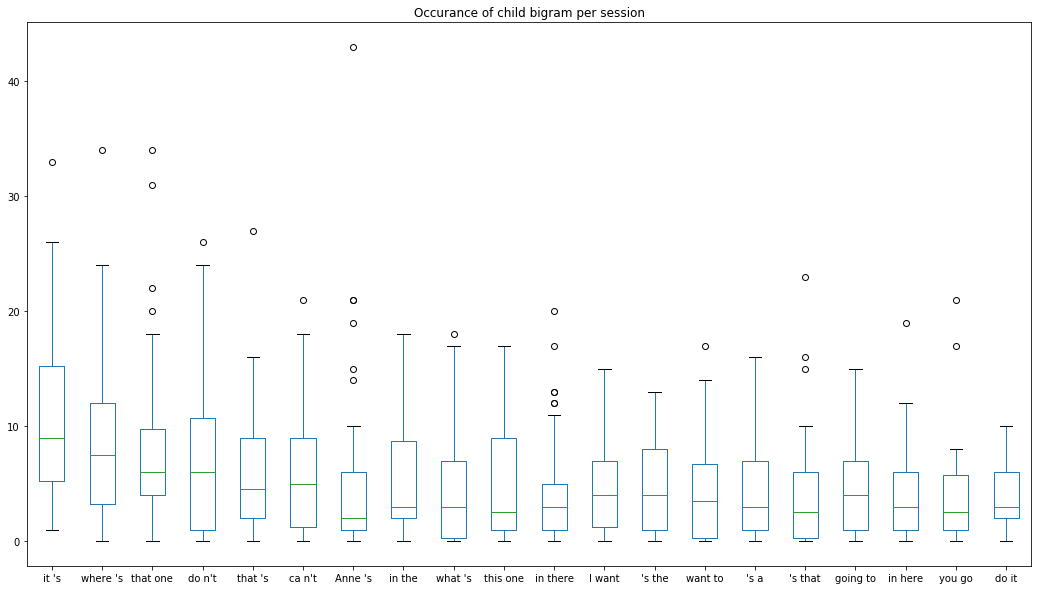

In [83]:
c = child[topgrams(target, 'CHI', 20)]
c.plot.box(title='Occurance of child bigram per session')
c.agg(['mean', 'std']).T

# Adult Bigrams

,mean,std
going to,36.529412,13.015691
that 's,35.823529,9.627834
are you,24.676471,11.877457
in the,23.470588,9.605034
do n't,22.470588,7.699804
it 's,22.058824,5.370747
do you,21.764706,6.959009
what 's,21.294118,9.971260
's the,15.647059,4.747455
is n't,15.058824,5.892683


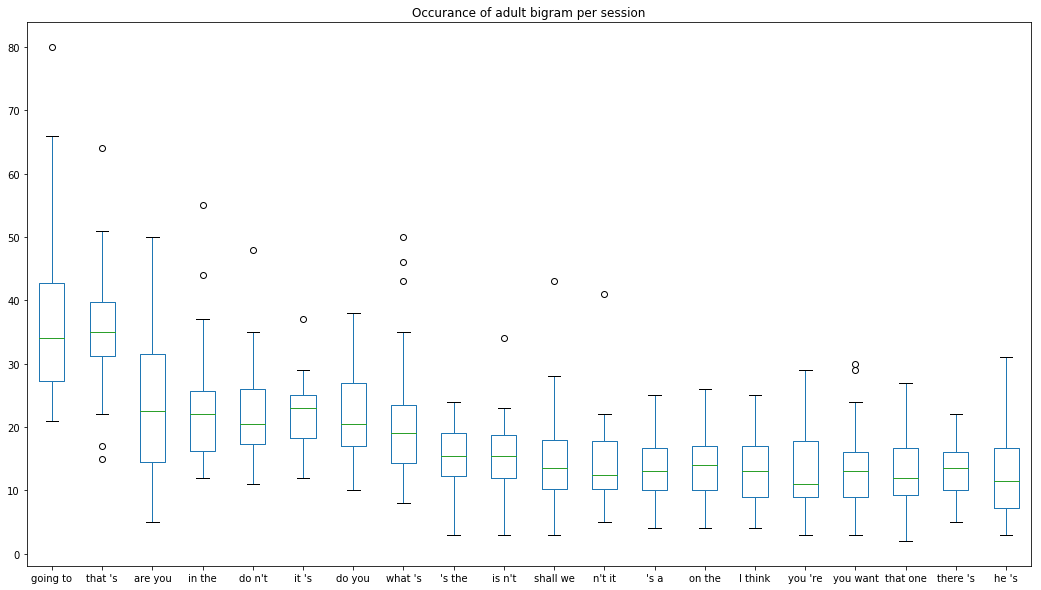

In [81]:
a = adult[topgrams(target, 'MOT', 20)]
a.plot.box(title='Occurance of adult bigram per session')
a.agg(['mean', 'std']).T

# Top 5 bigrams across sessions

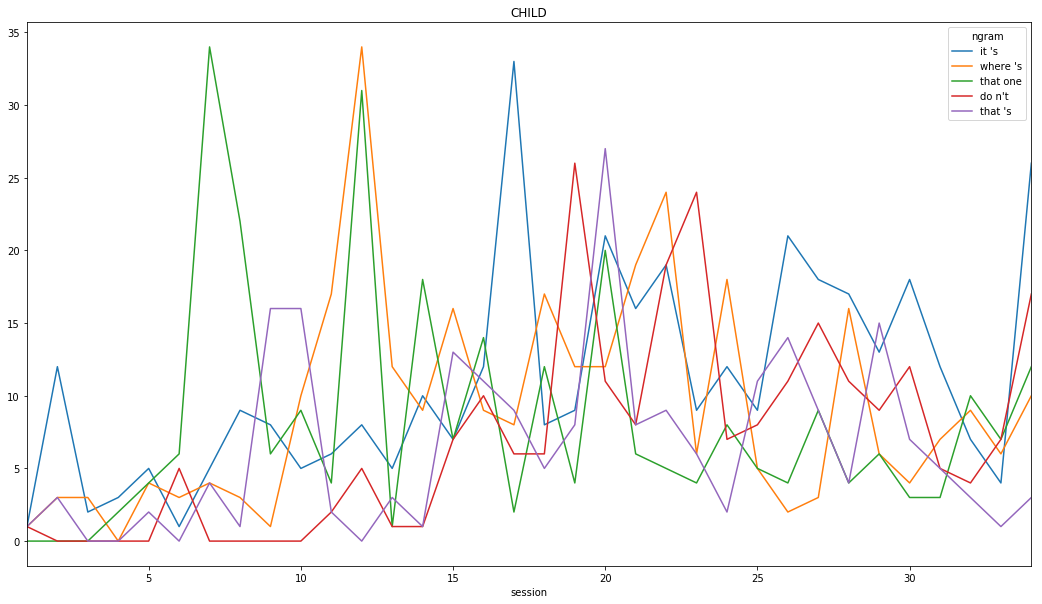

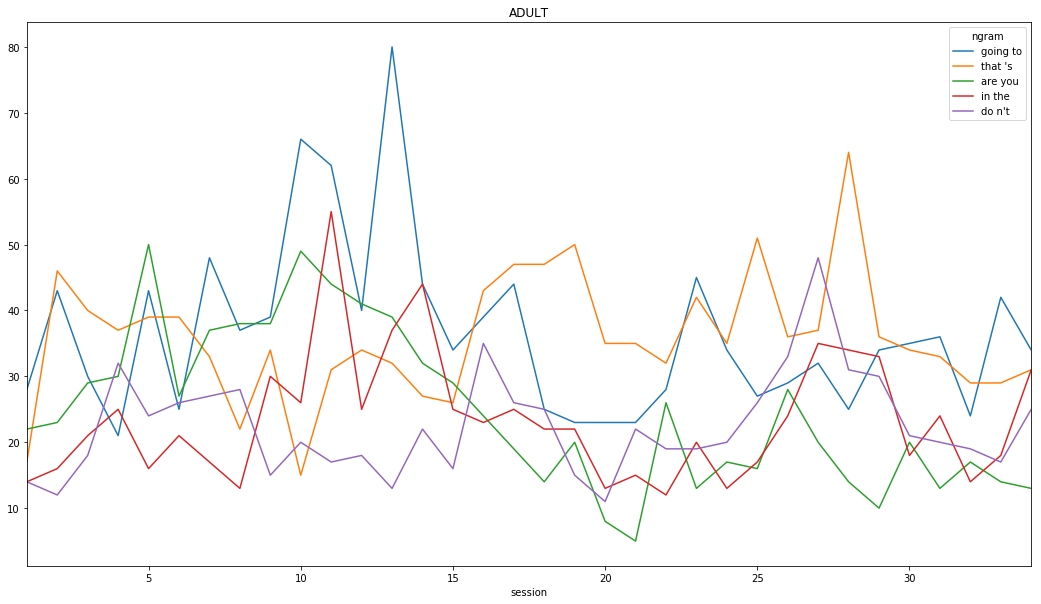

In [90]:
ntop = 5
child[topgrams(target, 'CHI', 5)].plot(title='CHILD')
adult[topgrams(target, 'MOT', 5)].plot(title='ADULT');

# Top 20 Bigrams across sessions

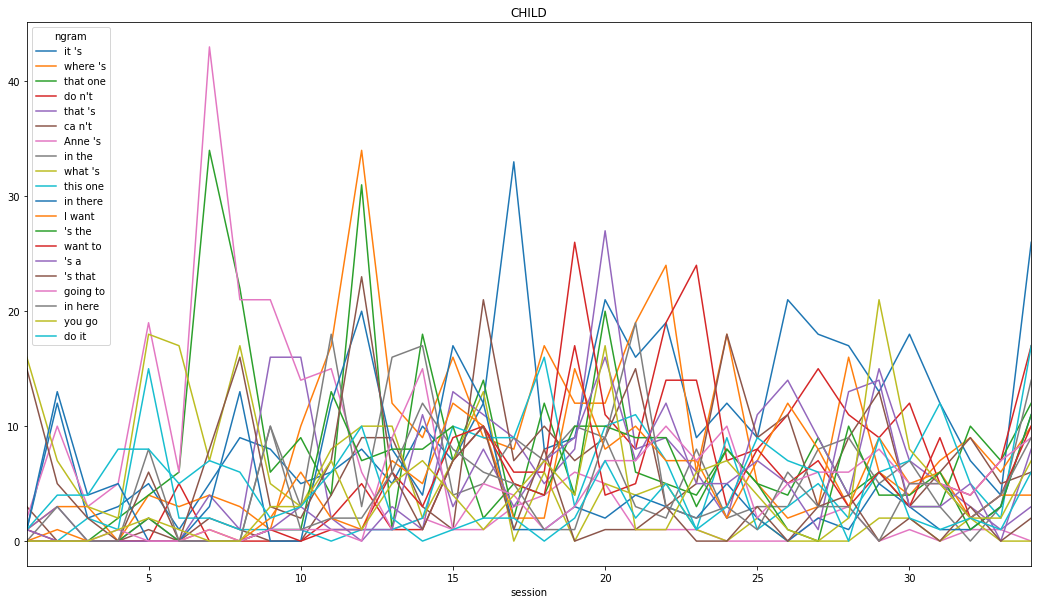

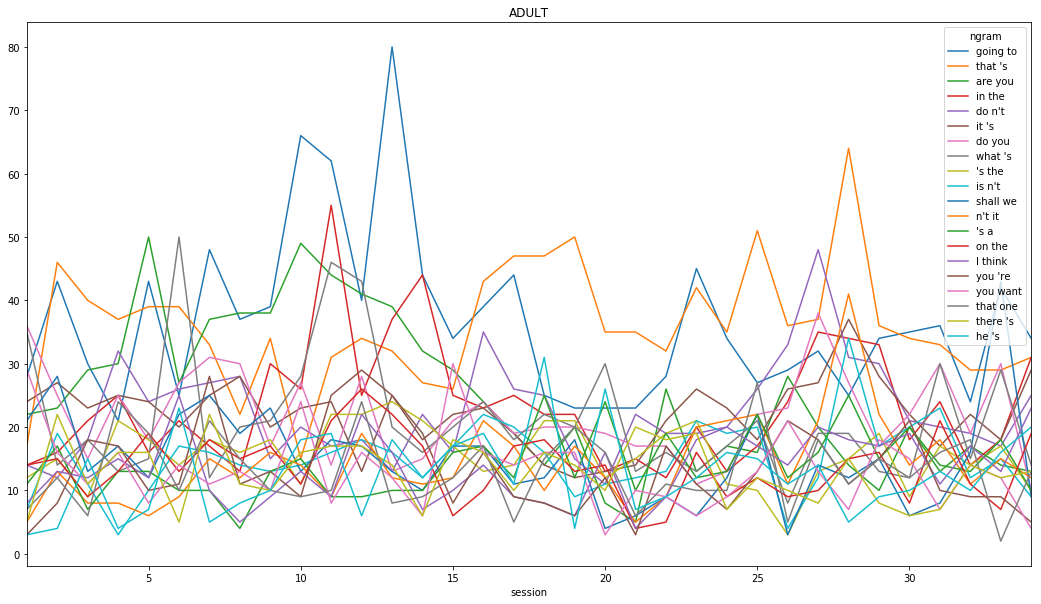

In [92]:
ntop = 20
child[topgrams(target, 'CHI', ntop)].plot(title='CHILD')
adult[topgrams(target, 'MOT', ntop)].plot(title='ADULT');